In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
y = np.array(['Chat', 'Chien', 'Chat', 'Oiseau'])

In [5]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [7]:
encoder.inverse_transform(np.array([0, 1, 0, 2]))

array(['Chat', 'Chien', 'Chat', 'Oiseau'], dtype='<U6')

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
encod = OrdinalEncoder()

In [15]:
X = np.array([['Chien', 'Chat'], ['Chat', 'Oiseau'], ['Chien', 'Oiseau']])

In [16]:
encod.fit_transform(X)

array([[1., 0.],
       [0., 1.],
       [1., 1.]])

In [17]:
from sklearn.preprocessing import LabelBinarizer

In [24]:
encode = LabelBinarizer(sparse_output=True)

In [25]:
y = np.array(['Chat', 'Chien', 'Chat', 'Oiseau'])

In [26]:
encode.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder()

In [29]:
X = np.array([['Chien', 'Chat'], ['Chat', 'Oiseau'], ['Chien', 'Oiseau']])

In [30]:
encoder.fit_transform(X)

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
X = np.array([[70], [80], [120]])
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

In [99]:
iris = load_iris()
X = iris.data
y = iris.target

print('X:', X.shape)

X: (150, 4)


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [59]:
model = make_pipeline(PolynomialFeatures(),StandardScaler(), SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [42]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {
     'polynomialfeatures__degree': [2, 3, 4],
     'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

In [61]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [62]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l2'}

In [63]:
grid.best_score_

0.9916666666666667

In [64]:
grid.score(X_test, y_test)

0.9666666666666667

# Learning Survived

In [65]:
from sklearn.cluster import KMeans

In [108]:
model = KMeans(n_clusters=3)
model.fit(X)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [109]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [110]:
import matplotlib.pyplot as plt

-78.85144142614602

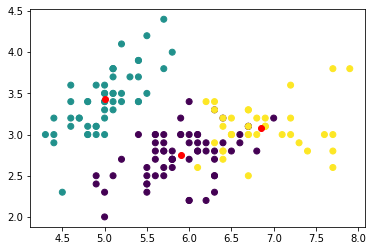

In [111]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='r')
model.inertia_
model.score(X)

In [104]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Coût du modèle (inertia)')

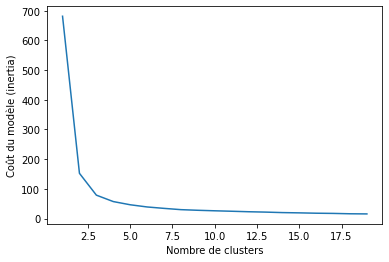

In [105]:
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle (inertia)')

In [112]:
from sklearn.ensemble import IsolationForest

In [113]:
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

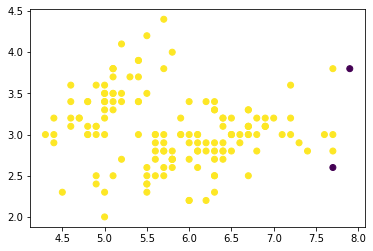

In [114]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X))

# DataSet Digits

In [115]:
from sklearn.datasets import load_digits

In [117]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


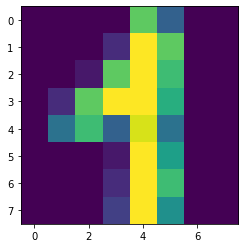

In [119]:
plt.imshow(images[42])

In [120]:
model = IsolationForest(random_state=0, contamination=0.02)

In [121]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [123]:
outliers = model.predict(X) == -1

In [124]:
outliers

array([False, False, False, ..., False, False, False])

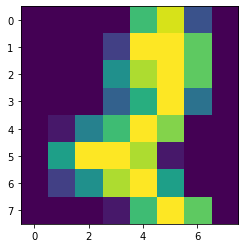

In [126]:
plt.imshow(images[outliers][0])

In [127]:
from sklearn.decomposition import PCA

In [129]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

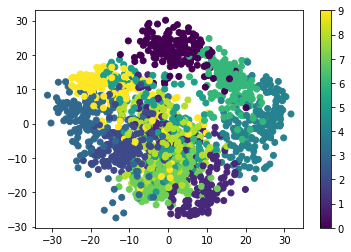

In [131]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.colorbar()

In [132]:
model.components_.shape

(2, 64)

In [138]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

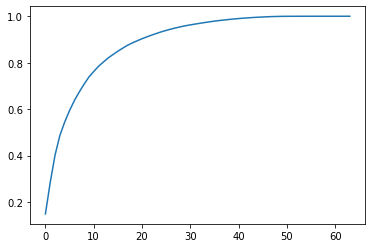

In [139]:
plt.plot(np.cumsum(model.explained_variance_ratio_))